**S**upport **V**ector **M**achine **(SVM)**

In this notebook the support vector machine is illustratet.
The SVM will be fittet to data from the built in datasets ['make_blob'](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html?highlight=make_blobs#sklearn.datasets.make_blobs) and ['make_circle'](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html?highlight=make_circle#sklearn.datasets.make_circles).


Support vector machines (SVMs) are a set of supervised learning methods used for [classification](https://scikit-learn.org/stable/modules/svm.html#svm-classification), [regression](https://scikit-learn.org/stable/modules/svm.html#svm-regression) and [outliers detection](https://scikit-learn.org/stable/modules/svm.html#svm-outlier-detection).

The following examples will show some classification cases.

<a id="example_1">**Example_1:**</a><br>linear seperatable data:

A support vector machine constructs a hyper-plane or set of hyper-planes in a high or infinite dimensional space, which can be used for classification, regression or other tasks. Intuitively, a good separation is achieved by the hyper-plane that has the largest distance to the nearest training data points of any class (so-called functional margin), since in general the larger the margin the lower the generalization error of the classifier. 
Samples on the margin boundaries are called “support vectors”:


dataset parameter ([make_blob](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html?highlight=make_blobs#sklearn.datasets.make_blobs)):
- nSamples = 800 :total number of points equally divided among clusters.
- rndState =  6  :Determines random number generation for dataset creation. Pass an int for reproducible output across multiple function calls.

model parameter ([SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) and [linearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)):
- kernel = 'linear'
- C = 100 : Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

d:\python_382\new_virtualenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


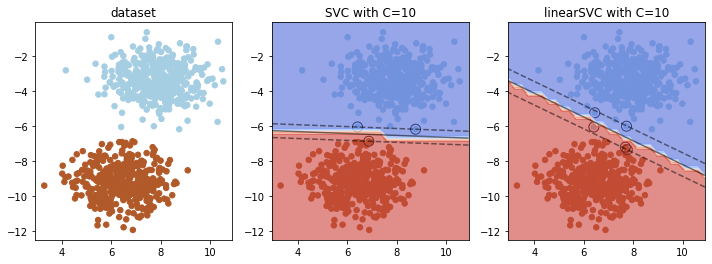

In [56]:
# code based on the example:
# https://scikit-learn.org/stable/auto_examples/svm/plot_linearsvc_support_vectors.html#sphx-glr-auto-examples-svm-plot-linearsvc-support-vectors-py
# and
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html
#
import numpy as np
from sklearn.datasets import make_blobs, make_circles
from sklearn.cluster import AffinityPropagation
from sklearn import svm
import matplotlib.pyplot as plt
#
#
nSamples = 800
rndState = 6
#
kernel = 'linear'
C = 10
#
# create dataset with nSample points
X, y = make_blobs(n_samples=nSamples, centers=2, random_state=rndState)
#
# create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
SVC= svm.SVC(kernel=kernel, C=C)
SVC.fit(X, y)
#
#
nCols = 3 # number of diagrams in a row
fig, ax = plt.subplots(ncols=nCols, nrows=1, figsize=(12,4))
#
#plot the raw data in all diagrams
for i in range(nCols):
    ax[i].scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
#
# create grid to evaluate model
# grid size: (h,h)
h = 30
#
xlim = ax[0].get_xlim()
ylim = ax[0].get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], h), np.linspace(ylim[0], ylim[1], h))
#
# ravel() returns a row vector of xx / yy 
# np.c_ returns a column vector. Here the returned array has the size(30x30,2)
#
# decision_function() returns the decision function of the sample for each class in the model. 
Z = SVC.decision_function(np.c_[xx.ravel(), yy.ravel()])
# reshape decision function from column vector to the size of the meshgrid
# -> from shape (h*h,) to shape (h,h)
Z = Z.reshape(xx.shape)
#
# plot decision function and margins
ax[1].contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# plot support vectors
ax[1].scatter(SVC.support_vectors_[:, 0], SVC.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
#
# Plot the decision boundary as colored area. For that, we will assign a color to each
# point in the meshgrid
#
ca = SVC.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
ax[1].contourf(xx, yy, ca, cmap=plt.cm.coolwarm, alpha=0.6)
#
# ------------------------------------------------------------------------------------------------------------------
# result with LinearSVC
#
# create instance and fit data
linSVC = svm.LinearSVC(C=C, loss="hinge", random_state=6).fit(X, y)
#
# in linearSVC one must go a slightly other way to get the support vectors as there is no member 'support_vectors_'
# obtain the support vectors through the decision function
decision_function = linSVC.decision_function(X)
support_vector_indices = np.where((2 * y - 1) * decision_function <= 1)[0]
support_vectors = X[support_vector_indices]
#
# decision functions of LinearSVC
Z1 = linSVC.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z1 = Z1.reshape(xx.shape)
#
# plot decision function and margins
ax[2].contour(xx, yy, Z1, colors='k', levels=[-1, 0, 1], alpha=0.5,
                linestyles=['--', '-', '--'])
ax[2].scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
#
# Plot the decision boundary as colored area. For that, we will assign a color to each
# point in the mesh.
#
ca = linSVC.predict(np.c_[xx.ravel(), yy.ravel()])
ca = ca.reshape(xx.shape)
#
# put the assigned colored of each point in a color-plot
ax[2].contourf(xx, yy, ca, cmap=plt.cm.coolwarm, alpha=0.6)
#
ax[0].set_title("dataset")
ax[1].set_title("SVC with C=" + str(C))
ax[2].set_title("linearSVC with C=" + str(C))
#
plt.show()

<a id="example_2">**Example_2:**</a><br>not seperatable data:


dataset parameter ([make_blob](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html?highlight=make_blobs#sklearn.datasets.make_blobs)):
- nSamples = 800 :total number of points equally divided among clusters.
- rndState =  4  :Determines random number generation for dataset creation. Pass an int for reproducible output across multiple function calls.

model parameter ([SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) and [linearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)):
- kernel = 'linear'
- C = 100 : Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

d:\python_382\new_virtualenv\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


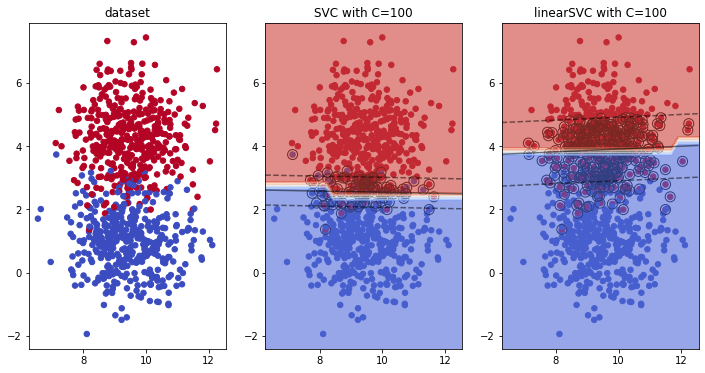

In [57]:
# code based on the example:
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py
# and
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html
#
import numpy as np
from sklearn.datasets import make_blobs, make_circles
from sklearn.cluster import AffinityPropagation
from sklearn import svm
import matplotlib.pyplot as plt
#
#
nSamples = 800
rndState = 4
#
kernel = 'linear'
C = 100
#
# create nSample data points
X, y = make_blobs(n_samples=nSamples, centers=2, random_state=rndState)
#
# create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
SVC = svm.SVC(kernel=kernel, C=C)
SVC.fit(X, y)
#
#
nCols = 3  # number of diagrams in a row
fig, ax = plt.subplots(ncols=nCols, nrows=1, figsize=(12,6))
#
# plot raw data in all diagrams
for i in range(nCols):
    ax[i].scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.coolwarm)
#
# create grid to evaluate model
# grid size: (h,h)
h = 30
#
xlim = ax[0].get_xlim()
ylim = ax[0].get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], h), np.linspace(ylim[0], ylim[1], h))
#
# get decision function and margins
Z = SVC.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
#
# plot decision functions
ax[1].contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
#
# plot support vectors
ax[1].scatter(SVC.support_vectors_[:, 0], SVC.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
#
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh.
#
ca = SVC.predict(np.c_[xx.ravel(), yy.ravel()])
ca = ca.reshape(xx.shape)
# put the assigned colored of each point in a color-plot
ax[1].contourf(xx, yy, ca, cmap=plt.cm.coolwarm, alpha=0.6)
#
#----------------------------------------------------------
# show result with LinearSVC
#
linSVC = svm.LinearSVC(C=C, loss="hinge").fit(X,y)
#
# decision function 
ZlinSVC = linSVC.decision_function(np.c_[xx.ravel(), yy.ravel()])
ZlinSVC = ZlinSVC.reshape(xx.shape)
#
# obtain the support vectors through the decision function
decision_function = linSVC.decision_function(X)
support_vector_indices = np.where((2 * y - 1) * decision_function <= 1)[0]
support_vectors = X[support_vector_indices]
#
#
# plot decision functions
ax[2].contour(xx,yy, ZlinSVC, colors='k', levels=[-1,0,1], alpha=0.5, linestyles=['--', '-', '--'])
# plot support vectors as circle-marked points
ax[2].scatter(support_vectors[:, 0], support_vectors[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
#
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh.
calinSVC = linSVC.predict(np.c_[xx.ravel(), yy.ravel()])
calinSVC = calinSVC.reshape(xx.shape)
#
# put the assigned colored of each point in a color-plot
ax[2].contourf(xx,yy, calinSVC, cmap=plt.cm.coolwarm, alpha=0.6)
#
#
ax[0].set_title("dataset")
ax[1].set_title("SVC with C=" + str(C))
ax[2].set_title("linearSVC with C=" + str(C))
#
plt.show()

<a id="example_3">**Example_3:**</a><br>non linear dataset:

create circle dataset and try to classify the dataset with a linear SVM. 

dataset parameter ([make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html?highlight=make_circle#sklearn.datasets.make_circles)):
- nSamples = 250 $\quad$ total number of points generated.
- noise =  0.1 $\qquad$ Standard deviation of Gaussian noise added to the data.
- factor = 0.4 $\qquad$Scale factor between inner and outer circle. $0<factor<1$

model parameter ([SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC) and [linearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC)):
- kernel = 'linear'
- C = 100: $\quad$ Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.

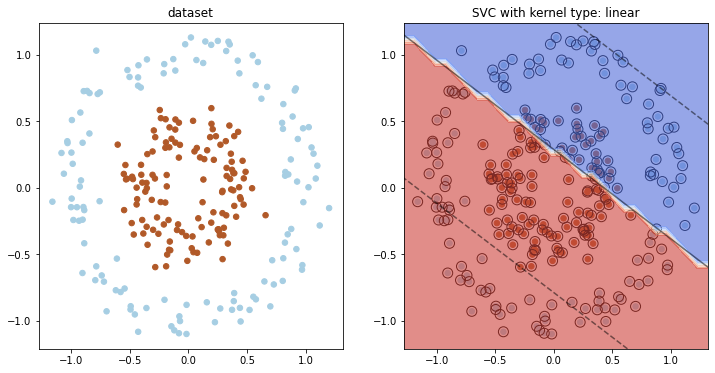

In [58]:
# code based on the example:
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py
# and
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html
#
import numpy as np
from sklearn.datasets import make_blobs, make_circles
from sklearn.cluster import AffinityPropagation
from sklearn import svm
import matplotlib.pyplot as plt
#
#
nSamples = 250
noise = 0.1
factor = 0.4
#
kernel = 'linear'
C = 100
#
# create datapoints
X, y = make_circles(n_samples=nSamples, factor=factor, noise=noise)
#
# create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
SVC = svm.SVC(kernel=kernel, C=C)
SVC.fit(X, y)
#
#
nCols =2 # number of diagrams in a row
fig, ax = plt.subplots(ncols=nCols, nrows=1, figsize=(12,6))
#
# plot raw data in all diagrams
for i in range(nCols):
    ax[i].scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# create grid to evaluate model
# grid size: (h,h)
h = 30
#
xlim = ax[0].get_xlim()
ylim = ax[0].get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], h), np.linspace(ylim[0], ylim[1], h))
#
# get decision function and margins
Z = SVC.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
##
# plot decision boundary and margins
ax[1].contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# plot support vectors
ax[1].scatter(SVC.support_vectors_[:, 0], SVC.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
#
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh.
ca = SVC.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
#
# put the assigned colored of each point in a color-plot
ax[1].contourf(xx, yy, ca, cmap=plt.cm.coolwarm, alpha=0.6)
#
ax[0].set_title("dataset")
ax[1].set_title("SVC with kernel type: " + str(kernel))
plt.show()

<a id="example_4">**Example_4:**</a><br>non linear dataset:

create circle dataset and try to classify the dataset with a polynomial SVM. 

dataset parameter ([make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html?highlight=make_circle#sklearn.datasets.make_circles)):
- nSamples = 250 $\quad$ total number of points generated.
- noise =  0.1 $\qquad$ Standard deviation of Gaussian noise added to the data.
- factor = 0.4 $\qquad$Scale factor between inner and outer circle. $0<factor<1$

model parameter ([SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)):
- kernel = 'linear'
- C = 100: $\quad$ Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.
- degree = 3 $\quad$ Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.
- gamma = [1, 0.001] $\quad$ Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

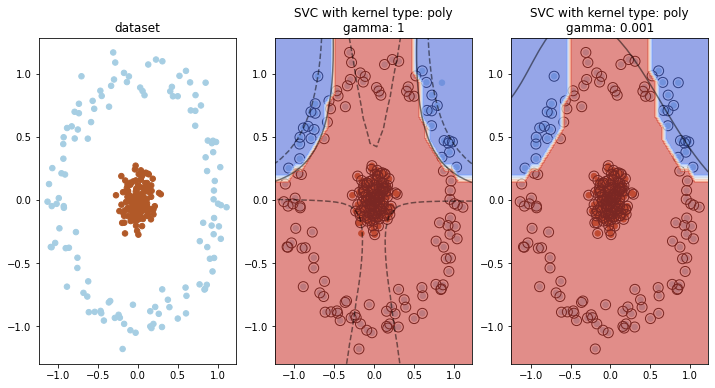

In [59]:
# code based on the example:
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py
# and
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html
#
import numpy as np
from sklearn.datasets import make_blobs, make_circles
from sklearn.cluster import AffinityPropagation
from sklearn import svm
import matplotlib.pyplot as plt
#
#
nSamples = 250
noise = 0.1
factor = 0.1
#
kernel = 'poly'
C = 100
degree = 3
gamma = [1, 0.001]
#
# we create data points
X, y = make_circles(n_samples=nSamples, factor=factor, noise=noise)
#
# create 2 instances of a polynomial SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
# 1st with gamma[0]
polySVC1 = svm.SVC(kernel=kernel, C=C, degree=degree, gamma=gamma[0])
polySVC1.fit(X, y)
# 2nd with gamma[1]
polySVC2 = svm.SVC(kernel=kernel, C=C, degree=degree, gamma=gamma[1])
polySVC2.fit(X, y)
#
nCols = 3 # number of diagrams in a row
fig, ax = plt.subplots(ncols=nCols, nrows=1, figsize=(12,6))
#
# plot raw data in all diagrams
for i in range(nCols):
    ax[i].scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)
#
# create grid to evaluate model
# grid size: (h,h)
h = 30
#
xlim = ax[0].get_xlim()
ylim = ax[0].get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], h), np.linspace(ylim[0], ylim[1], h))
#
# get decision function and margins
Z1 = polySVC1.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z2 = polySVC2.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
#
#
# plot decision boundary and margins
ax[1].contour(xx, yy, Z1, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax[2].contour(xx, yy, Z2, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# plot support vectors
ax[1].scatter(polySVC1.support_vectors_[:, 0], polySVC1.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
ax[2].scatter(polySVC2.support_vectors_[:, 0], polySVC2.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
#
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh.
ca_1 = polySVC1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
ca_2 = polySVC1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
#
# put the assigned colored of each point in a color-plot
ax[1].contourf(xx, yy, ca_1, cmap=plt.cm.coolwarm, alpha=0.6)
ax[2].contourf(xx, yy, ca_2, cmap=plt.cm.coolwarm, alpha=0.6)
#
ax[0].set_title("dataset")
ax[1].set_title("SVC with kernel type: " + str(kernel) + "\ngamma: " + str(gamma[0]))
ax[2].set_title("SVC with kernel type: " + str(kernel) + "\ngamma: " + str(gamma[1]))
#
plt.show()

<a id="example_6">**Example_6:**</a><br>SVM with sigmoid kernel

dataset parameter ([make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html?highlight=make_circle#sklearn.datasets.make_circles)):
- nSamples = 250 $\quad$ total number of points generated.
- noise =  0.1 $\qquad$ Standard deviation of Gaussian noise added to the data.
- factor = 0.4 $\qquad$Scale factor between inner and outer circle. $0<factor<1$

model parameter ([SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)):
- kernel = 'sigmoid'
- C = 100: $\quad$ Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.
- degree = 3 $\quad$ Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.
- gamma = [1, 0.001] $\quad$ Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

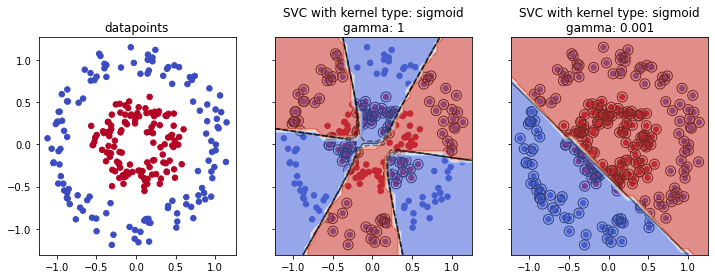

In [60]:
# code based on the example:
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py
# and
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html
#
import numpy as np
from sklearn.datasets import make_blobs, make_circles
from sklearn.cluster import AffinityPropagation
from sklearn import svm
import matplotlib.pyplot as plt
#
#
nSamples = 250
noise = 0.1
factor = 0.4
#
kernel = 'sigmoid'
C = 100
degree = 3
gamma = [1, 0.001]
#
# create data points
X, y = make_circles(n_samples=nSamples, factor=factor, noise=noise)
#
# create 2 instances of a polynomial SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
# 1st with gamma[0]
clf_0 = svm.SVC(kernel=kernel, C=C, degree=degree, gamma = gamma[0])
clf_0.fit(X, y)
# 2nd with gamma[1]
clf_1 = svm.SVC(kernel=kernel, C=C, degree=degree, gamma = gamma[1])
clf_1.fit(X, y)
#
#
nCols = 3
fig, ax = plt.subplots(ncols=nCols, nrows=1, figsize=(12,4), sharey='all')
#
# plot raw data in all diagrams
for i in range(nCols):
    ax[i].scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.coolwarm)

# create grid to evaluate model
# grid size: (h,h)
h = 30
#
xlim = ax[0].get_xlim()
ylim = ax[0].get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], h), np.linspace(ylim[0], ylim[1], h))
#
# get decision functions and margings
Z0 = clf_0.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z1 = clf_1.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
##
# plot decision boundary and margins
ax[1].contour(xx, yy, Z0, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax[2].contour(xx, yy, Z1, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# plot support vectors
ax[1].scatter(clf_0.support_vectors_[:, 0], clf_0.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
ax[2].scatter(clf_1.support_vectors_[:, 0], clf_1.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
#
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh.
ca_0 = clf_0.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
ca_1 = clf_1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
#
# put the assigned colored of each point in a color-plot
ax[1].contourf(xx, yy, ca_0, cmap=plt.cm.coolwarm, alpha=0.6)
ax[2].contourf(xx, yy, ca_1, cmap=plt.cm.coolwarm, alpha=0.6)
#
#
ax[0].set_title("datapoints")
ax[1].set_title("SVC with kernel type: " + str(kernel) + "\ngamma: " + str(gamma[0]))
ax[2].set_title("SVC with kernel type: " + str(kernel) + "\ngamma: " + str(gamma[1]))
plt.show()

<a id="example_7">**Example_6:**</a><br>SVM with radial base function

**7.1:**<br> 3 dimensional visualization of circles 

dataset parameter ([make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html?highlight=make_circle#sklearn.datasets.make_circles)):
- nSamples = 250 $\quad$ total number of points generated.
- noise =  0.1 $\qquad$ Standard deviation of Gaussian noise added to the data.
- factor = 0.4 $\qquad$Scale factor between inner and outer circle. $0<factor<1$


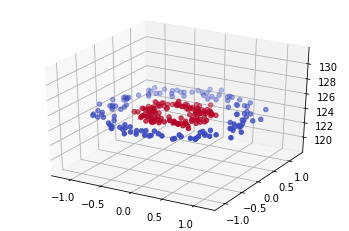

In [61]:
# code based on the example:
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py
# and
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html
#
import numpy as np
from sklearn.datasets import make_blobs, make_circles
from sklearn.cluster import AffinityPropagation
from sklearn import svm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#
#
nSamples = 250
noise = 0.1
factor = 0.4
#
kernel = 'poly'
C = 1000
degree = 3
gamma = [0.3, 0.001]
#
# create data points 
X, y = make_circles(n_samples=nSamples, factor=factor, noise=noise)
#
# generate a new dimenstion 'r' as circles are 2 dimensional data:
#r = np.exp(-(X**2).sum(1))
r=np.sum(y)
#
nCols = 1
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#
ax.scatter(X[:,0], X[:,1], r, c=y, cmap=plt.cm.coolwarm)
#


**7.2**<br>
kernel trick with radial base function (rbf)

dataset parameter ([make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html?highlight=make_circle#sklearn.datasets.make_circles)):
- nSamples = 250 $\quad$ total number of points generated.
- noise =  0.1 $\qquad$ Standard deviation of Gaussian noise added to the data.
- factor = 0.4 $\qquad$Scale factor between inner and outer circle. $0<factor<1$

model parameter ([SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)):
- kernel = 'rbf'
- C = 100: $\quad$ Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.
- gamma = [1, 0.001] $\quad$ Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

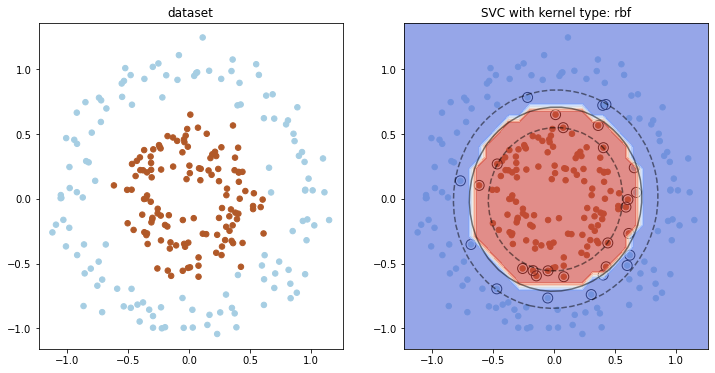

In [62]:
# code based on the example:
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py
# and
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html
#
import numpy as np
from sklearn.datasets import make_blobs, make_circles
from sklearn.cluster import AffinityPropagation
from sklearn import svm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#
#
nSamples = 250
noise = 0.1
factor = 0.4
#
kernel = 'rbf'
C = 100
#
# create data points
X, y = make_circles(n_samples=nSamples, factor=factor, noise=noise)
#
# create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
clf = svm.SVC(kernel=kernel, C=C, gamma = 0.1)
clf.fit(X, y)
#
nCols =2 #number of plots in a row
fig, ax = plt.subplots(ncols=nCols, nrows=1, figsize=(12,6))
#
# plot raw data in all diagrams
for i in range(nCols):
    ax[i].scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=plt.cm.Paired)

# create grid to evaluate model
# grid size: (h,h)
h = 30
#
xlim = ax[0].get_xlim()
ylim = ax[0].get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], h), np.linspace(ylim[0], ylim[1], h))
#
# get decision function and margins
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
#
# plot decision boundary and margins
ax[1].contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# plot support vectors
ax[1].scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
#
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh.
ca = clf.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
# put the assigned colored of each point in a color-plot
ax[1].contourf(xx, yy, ca, cmap=plt.cm.coolwarm, alpha=0.6)
#
ax[0].set_title("dataset")
ax[1].set_title("SVC with kernel type: " + str(kernel))
#
# ax3 = fig.add_subplot(112, projection="3d")
plt.show()

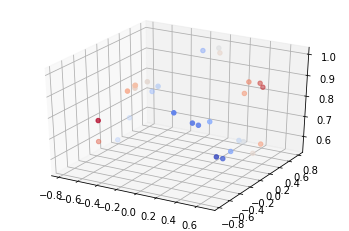

In [63]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#
testX = clf.support_vectors_[:, 0]
testY = clf.support_vectors_[:, 1]
testZ = testX * testY
ax.scatter(testX, testY, np.exp(-(testX**2)), c=testZ, cmap=plt.cm.coolwarm)
# ax.scatter(X[:,0], X[:,1], np.exp(-(X**2).sum(1)) ,c=y, cmap=plt.cm.coolwarm)

**7.3**<br>
SVM with rbf kernel and differnt gamma values.

dataset parameter ([make_circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html?highlight=make_circle#sklearn.datasets.make_circles)):
- nSamples = 250 $\quad$ total number of points generated.
- noise =  0.1 $\qquad$ Standard deviation of Gaussian noise added to the data.
- factor = 0.4 $\qquad$Scale factor between inner and outer circle. $0<factor<1$

model parameter ([SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)):
- kernel = 'rbf'
- C = 100: $\quad$ Regularization parameter. The strength of the regularization is inversely proportional to C. Must be strictly positive. The penalty is a squared l2 penalty.
- gamma = [0.8, 0.1] $\quad$ Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.

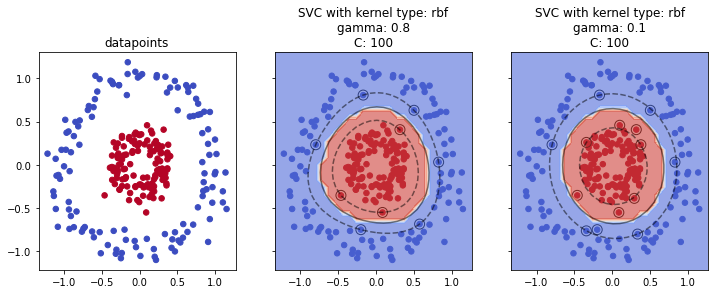

In [64]:
# code based on the example:
# https://scikit-learn.org/stable/auto_examples/svm/plot_separating_hyperplane.html#sphx-glr-auto-examples-svm-plot-separating-hyperplane-py
# and
# https://scikit-learn.org/stable/auto_examples/svm/plot_iris_svc.html
#
import numpy as np
from sklearn.datasets import make_blobs, make_circles
from sklearn.cluster import AffinityPropagation
from sklearn import svm
import matplotlib.pyplot as plt
#
#
nSamples = 250
noise = 0.1
factor = 0.3
#
kernel = 'rbf'
C = 100
gamma = [0.8, 0.1]
#
# create data points
X, y = make_circles(n_samples=nSamples, factor=factor, noise=noise)
#
# create 2 instances of a polynomial SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
# 1st with gamma[0]
clf_0 = svm.SVC(kernel=kernel, C=C, gamma = gamma[0])
clf_0.fit(X, y)
# 2nd with gamma[1]
clf_1 = svm.SVC(kernel=kernel, C=C, gamma = gamma[1])
clf_1.fit(X, y)
#
#
nCols = 3 # number of diagrams in a row
fig, ax = plt.subplots(ncols=nCols, nrows=1, figsize=(12,4), sharey='all')
#
# plot raw data in all diagrams
for i in range(nCols):
    ax[i].scatter(X[:,0], X[:,1], c=y, s=30, cmap=plt.cm.coolwarm)

# create grid to evaluate model
# grid size: (h,h)
h = 30
#
xlim = ax[0].get_xlim()
ylim = ax[0].get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], h), np.linspace(ylim[0], ylim[1], h))
#
# get decision function and margins
Z0 = clf_0.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
Z1 = clf_1.decision_function(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
#
#
# plot decision boundary and margins
ax[1].contour(xx, yy, Z0, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
ax[2].contour(xx, yy, Z1, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
# plot support vectors
ax[1].scatter(clf_0.support_vectors_[:, 0], clf_0.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
ax[2].scatter(clf_1.support_vectors_[:, 0], clf_1.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
#
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh.
ca_0 = clf_0.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
ca_1 = clf_1.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
# put assigned points in a color plot
ax[1].contourf(xx, yy, ca_0, cmap=plt.cm.coolwarm, alpha=0.6)
ax[2].contourf(xx, yy, ca_1, cmap=plt.cm.coolwarm, alpha=0.6)
#
#
ax[0].set_title("datapoints")
ax[1].set_title("SVC with kernel type: " + str(kernel) + "\ngamma: " + str(gamma[0]) +"\nC: " + str(C))
ax[2].set_title("SVC with kernel type: " + str(kernel) + "\ngamma: " + str(gamma[1]) +"\nC: " + str(C))
plt.show()

Copyright © 2020 IUBH Internationale Hochschule